In [70]:
# testing out folium js

import pandas as pd
import numpy as np
import re
import requests
import folium

# custom base files
import base
import dc_base

import matplotlib.pyplot as plt

In [2]:
dc_data = pd.read_csv("./data/dc/2016-Q3-Trips-History-Data-1.csv")


dc_data.rename(columns = dc_base.dc_to_ny_columns, inplace=True)
print(dc_data.shape)
dc_data.head()

(723741, 9)


,tripduration,starttime,endtime,start station id,start station name,end station id,end station name,bikeid,usertype
0,840866,8/31/2016 23:59,9/1/2016 0:13,31117,15th & Euclid St NW,31228,8th & H St NW,W20409,Registered
1,656098,8/31/2016 23:58,9/1/2016 0:09,31279,19th & G St NW,31600,5th & K St NW,W20756,Registered
2,353159,8/31/2016 23:58,9/1/2016 0:04,31107,Lamont & Mt Pleasant NW,31101,14th & V St NW,W22626,Registered
3,219234,8/31/2016 23:58,9/1/2016 0:02,31200,Massachusetts Ave & Dupont Circle NW,31212,21st & M St NW,W00980,Casual
4,213473,8/31/2016 23:56,8/31/2016 23:59,31281,8th & O St NW,31280,11th & S St NW,W21338,Registered


In [3]:
dc_coords = dc_base.get_dc_coordinates(dc_data)
dc_coords.head()

,docks,id,lat,lon,station
0,19,417,38.829545,-77.047844,Potomac & Swann Ave
1,11,94,38.910972,-77.004950,Eckington Pl & Q St NE
2,11,246,38.867262,-77.072315,Columbia Pike & S Orme St
3,15,279,39.123513,-77.157410,Needwood Rd & Eagles Head Ct
4,19,250,38.918155,-77.004746,Rhode Island Ave & V St NE


In [4]:
dc_data = base.merge_stations_and_coords(dc_data, dc_coords)
dc_data.head()

,tripduration,starttime,endtime,start station id,start station name,end station id,end station name,bikeid,usertype,start_docks,start station latitude,start station longitude,end_docks,end station latitude,end station longitude
0,840866,8/31/2016 23:59,9/1/2016 0:13,31117,15th & Euclid St NW,31228,8th & H St NW,W20409,Registered,15,38.92333,-77.0352,33,38.8997,-77.023086
1,1116818,8/30/2016 16:06,8/30/2016 16:25,31117,15th & Euclid St NW,31228,8th & H St NW,W20250,Registered,15,38.92333,-77.0352,33,38.8997,-77.023086
2,1097429,8/29/2016 16:06,8/29/2016 16:25,31117,15th & Euclid St NW,31228,8th & H St NW,W21328,Registered,15,38.92333,-77.0352,33,38.8997,-77.023086
3,1051420,8/26/2016 18:29,8/26/2016 18:47,31117,15th & Euclid St NW,31228,8th & H St NW,W21606,Registered,15,38.92333,-77.0352,33,38.8997,-77.023086
4,1051005,8/25/2016 16:06,8/25/2016 16:23,31117,15th & Euclid St NW,31228,8th & H St NW,W20082,Registered,15,38.92333,-77.0352,33,38.8997,-77.023086


In [5]:
dc_elevations = base.get_elevations(dc_data)
dc_elevations.head()

,name,latitude,longitude,elevation
0,15th & Euclid St NW,38.923330,-77.035200,57.981518
17,19th & G St NW,38.898412,-77.043182,18.863958
52,Lamont & Mt Pleasant NW,38.931900,-77.038800,61.802509
65,Massachusetts Ave & Dupont Circle NW,38.910100,-77.044400,27.299843
111,8th & O St NW,38.908640,-77.022770,28.104618


In [6]:
dc_data = base.merge_elevations(dc_data, dc_elevations)
dc_data.head()

,tripduration,starttime,endtime,start station id,start station name,end station id,end station name,bikeid,usertype,start_docks,start station latitude,start station longitude,end_docks,end station latitude,end station longitude,start elevation,end elevation
0,840866,8/31/2016 23:59,9/1/2016 0:13,31117,15th & Euclid St NW,31228,8th & H St NW,W20409,Registered,15,38.92333,-77.0352,33,38.8997,-77.023086,57.981518,13.753716
1,1116818,8/30/2016 16:06,8/30/2016 16:25,31117,15th & Euclid St NW,31228,8th & H St NW,W20250,Registered,15,38.92333,-77.0352,33,38.8997,-77.023086,57.981518,13.753716
2,1097429,8/29/2016 16:06,8/29/2016 16:25,31117,15th & Euclid St NW,31228,8th & H St NW,W21328,Registered,15,38.92333,-77.0352,33,38.8997,-77.023086,57.981518,13.753716
3,1051420,8/26/2016 18:29,8/26/2016 18:47,31117,15th & Euclid St NW,31228,8th & H St NW,W21606,Registered,15,38.92333,-77.0352,33,38.8997,-77.023086,57.981518,13.753716
4,1051005,8/25/2016 16:06,8/25/2016 16:23,31117,15th & Euclid St NW,31228,8th & H St NW,W20082,Registered,15,38.92333,-77.0352,33,38.8997,-77.023086,57.981518,13.753716


In [86]:
#https://app.dominodatalab.com/r00sj3/crimemaps/view/examples.ipynb
### putting folium inline
import folium
from IPython.display import HTML

def display(m, height=300):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

In [16]:
map = folium.Map(location=[38.910100 ,-77.044400])

In [37]:
map.save('dc_test.html')

In [39]:
nyc_map = folium.Map(location=[40.771671,-73.9743757])
nyc_map.save("nyc_test.html")

In [42]:
# #



AttributeError: 'Series' object has no attribute 'hour'

In [53]:
#times = pd.to_datetime(dc_data.starttime)
times = pd.to_datetime(dc_data["starttime"])


In [55]:
times[1:5]

1    16
2    16
3    18
4    16
Name: starttime, dtype: int64

In [57]:
trips_by_hour = dc_data.groupby(times.map(lambda x:x.hour)).agg(['count'])

In [62]:
trips_by_hour["starttime"]

,count
starttime,
0,5939
1,3429
2,2041
3,1152
4,959
5,4460
6,14790
7,37761
8,53541


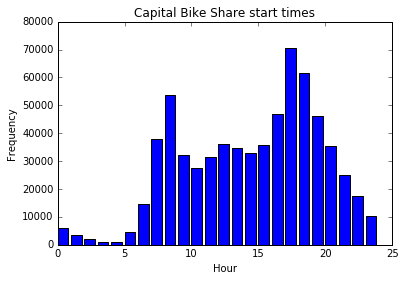

In [69]:
% matplotlib inline

fig = plt.bar(range(0,24),trips_by_hour["starttime"]["count"])
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Capital Bike Share start times')

plt.show()

In [73]:
# station status
# https://gbfs.capitalbikeshare.com/gbfs/en/station_status.json

# station info
# https://gbfs.capitalbikeshare.com/gbfs/en/station_information.json

stations = pd.read_json("https://gbfs.capitalbikeshare.com/gbfs/en/station_information.json", orient="stations")
stations.head()

,data,last_updated,ttl
stations,"[{'region_id': 41, 'capacity': 15, 'rental_met...",1490476203,10


In [74]:
import requests
import json

station_json_req = requests.get("https://gbfs.capitalbikeshare.com/gbfs/en/station_information.json")

station_json = json.loads(station_json_req.text)



In [84]:
stations_array = station_json["data"]["stations"]


# for s in stations_array:
# #     "station_id": "1",
# # "name": "Eads St & 15th St S",
# # "short_name": "31000",
# # "lat": 38.858971,
# # "lon": -77.05323,
# # "region_id": 41,
# # "rental_methods": [
# # "KEY",
# # "CREDITCARD"
# # ],
# # "capacity": 15,
# # "eightd_has_key_dispenser": false
#     to_df.append({'id':s['station_id'], 'name': s['name'], 'lat': s['lat'], 'lon': s['lon'], 'region': s['region_id'], 'capacity': s['capacity']})
    
    
stations = pd.DataFrame.from_records(stations_array)

stations.head()

,capacity,eightd_has_key_dispenser,lat,lon,name,region_id,rental_methods,short_name,station_id
0,15,False,38.858971,-77.053230,Eads St & 15th St S,41,"[KEY, CREDITCARD]",31000,1
1,11,False,38.857250,-77.053320,18th & Eads St.,41,"[KEY, CREDITCARD]",31001,2
2,17,False,38.856425,-77.049232,20th & Crystal Dr,41,"[KEY, CREDITCARD]",31002,3
3,11,False,38.860170,-77.049593,15th & Crystal Dr,41,"[KEY, CREDITCARD]",31003,4
4,11,False,38.857866,-77.059490,Aurora Hills Community Ctr/18th & Hayes St,41,"[KEY, CREDITCARD]",31004,5


In [82]:
status_json_req = requests.get("https://gbfs.capitalbikeshare.com/gbfs/en/station_status.json")

status_json = json.loads(status_json_req.text)

station_status = status_json["data"]["stations"]
#station_status

In [83]:
status = pd.DataFrame.from_records(station_status)
status.head()

,eightd_has_available_keys,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,station_id
0,False,1,1,1,1490475096,5,0,10,0,1
1,False,1,1,1,1490468965,0,0,11,0,2
2,False,1,1,1,1490475659,0,0,17,0,3
3,False,1,1,1,1490476175,2,0,9,0,4
4,False,1,1,1,1490476770,7,0,4,0,5


In [85]:
status = pd.merge(status, stations, on = 'station_id')
status.head()

,eightd_has_available_keys,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,station_id,capacity,eightd_has_key_dispenser,lat,lon,name,region_id,rental_methods,short_name
0,False,1,1,1,1490475096,5,0,10,0,1,15,False,38.858971,-77.053230,Eads St & 15th St S,41,"[KEY, CREDITCARD]",31000
1,False,1,1,1,1490468965,0,0,11,0,2,11,False,38.857250,-77.053320,18th & Eads St.,41,"[KEY, CREDITCARD]",31001
2,False,1,1,1,1490475659,0,0,17,0,3,17,False,38.856425,-77.049232,20th & Crystal Dr,41,"[KEY, CREDITCARD]",31002
3,False,1,1,1,1490476175,2,0,9,0,4,11,False,38.860170,-77.049593,15th & Crystal Dr,41,"[KEY, CREDITCARD]",31003
4,False,1,1,1,1490476770,7,0,4,0,5,11,False,38.857866,-77.059490,Aurora Hills Community Ctr/18th & Hayes St,41,"[KEY, CREDITCARD]",31004


In [103]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),101))
#colors


In [97]:
colors[12].hex

'#f03a00'

In [116]:
def get_popup(station):
    ret = station["name"] + "\t"
    ret += "Available: " + str(station["num_bikes_available"]) + "\t"
    ret += "Capacity: " + str(station["capacity"])
    
    return ret
    

In [117]:

map = folium.Map(location=[38.910100 ,-77.044400])
#map.simple_marker([38.910100 ,-77.044400])

for station in status.iterrows():
    #print(station)
    pct_available = round(100* station[1]["num_bikes_available"] / station[1]["capacity"])
    #print(pct_available)
    folium.CircleMarker([station[1]["lat"], station[1]["lon"]], popup=get_popup(station[1]), fill_color=colors[pct_available].hex, radius=5).add_to(map)
    #break
    #
map

In [118]:
map.save('dc_test.html')

In [123]:
## for nyc

nyc_station_json_req = requests.get("https://gbfs.citibikenyc.com/gbfs/en/station_information.json")

nyc_station_json = json.loads(nyc_station_json_req.text)
nyc_stations_array = nyc_station_json["data"]["stations"]

nyc_stations = pd.DataFrame.from_records(nyc_stations_array)

nyc_stations.head()

,capacity,eightd_has_key_dispenser,lat,lon,name,region_id,rental_methods,short_name,station_id
0,39,False,40.767272,-73.993929,W 52 St & 11 Ave,71,"[KEY, CREDITCARD]",6926.01,72
1,33,False,40.719116,-74.006667,Franklin St & W Broadway,71,"[KEY, CREDITCARD]",5430.08,79
2,27,False,40.711174,-74.000165,St James Pl & Pearl St,71,"[KEY, CREDITCARD]",5167.06,82
3,62,False,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl,71,"[KEY, CREDITCARD]",4354.07,83
4,39,False,40.741776,-74.001497,W 17 St & 8 Ave,71,"[KEY, CREDITCARD]",6148.02,116


In [133]:
nyc_status_json_req = requests.get("https://gbfs.citibikenyc.com/gbfs/en/station_status.json")

nyc_status_json = json.loads(nyc_status_json_req.text)

nyc_station_status = nyc_status_json["data"]["stations"]

nyc_status = pd.DataFrame.from_records(nyc_station_status)

nyc_status.head()

,eightd_has_available_keys,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,station_id
0,False,1,1,1,1490479975,10,1,28,0,72
1,False,1,1,1,1490479318,28,1,4,0,79
2,False,1,1,1,1490479509,2,0,25,0,82
3,False,1,1,1,1490479638,35,1,26,0,83
4,False,1,1,1,1490480542,1,2,36,0,116


In [134]:
nyc_status = pd.merge(nyc_status, nyc_stations, on = 'station_id')
nyc_status.head()

,eightd_has_available_keys,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,station_id,capacity,eightd_has_key_dispenser,lat,lon,name,region_id,rental_methods,short_name
0,False,1,1,1,1490479975,10,1,28,0,72,39,False,40.767272,-73.993929,W 52 St & 11 Ave,71,"[KEY, CREDITCARD]",6926.01
1,False,1,1,1,1490479318,28,1,4,0,79,33,False,40.719116,-74.006667,Franklin St & W Broadway,71,"[KEY, CREDITCARD]",5430.08
2,False,1,1,1,1490479509,2,0,25,0,82,27,False,40.711174,-74.000165,St James Pl & Pearl St,71,"[KEY, CREDITCARD]",5167.06
3,False,1,1,1,1490479638,35,1,26,0,83,62,False,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl,71,"[KEY, CREDITCARD]",4354.07
4,False,1,1,1,1490480542,1,2,36,0,116,39,False,40.741776,-74.001497,W 17 St & 8 Ave,71,"[KEY, CREDITCARD]",6148.02


In [137]:
#nyc_map = folium.Map(location=[40.771671,-73.9743757])
#nyc_map.save("nyc_test.html")
nyc_map = folium.Map(location=[40.771671,-73.9743757])
#map.simple_marker([38.910100 ,-77.044400])

for station in nyc_status.iterrows():
    #print(station)
    if station[1]["capacity"] > 0:
        pct_available = round(100* station[1]["num_bikes_available"] / station[1]["capacity"])
    else:
        pct_available = 0
        
    #print(pct_available)
    folium.CircleMarker([station[1]["lat"], station[1]["lon"]], popup=get_popup(station[1]), fill_color=colors[pct_available].hex, radius=5).add_to(nyc_map)
    #break
    #
nyc_map

In [138]:
nyc_map.save("nyc_test.html")